In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
import numpy as np 
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 53s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
classes = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]
     

TypeError: only integer scalar arrays can be converted to a scalar index

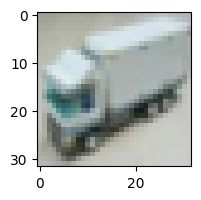

In [6]:
import matplotlib.pyplot as plt 

def plot_sample(X , y , index):
    plt.figure(figsize=(15 , 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train , y_train , 53)

In [ ]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [12]:
model = Sequential([
    # First convolutional block
    Conv2D(64, (3,3), activation="relu", input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional block with more filters
    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Third convolutional block with more filters
    Conv2D(256, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),  # You might want to remove this

    # Flatten layer
    Flatten(),

    # Fully connected layers with dropout for regularization
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),

    # Output layer
    Dense(10, activation="softmax")
])

model.summary()


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,062,922 (4.05 MB)

 Trainable params: 1,062,026 (4.05 MB)

 Non-trainable params: 896 (3.50 KB)

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:


# train the model
model.fit(X_train , y_train , epochs=10 , validation_data=(X_test , y_test))

Epoch 1/10
 417/1563 ━━━━━━━━━━━━━━━━━━━━ 1:16 67ms/step - accuracy: 0.1597 - loss: 2.6585

KeyboardInterrupt: 